# Playback Walkthrough

Explore deterministic playback outputs for the minitoy scenario using the shared analytics utilities.

In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().resolve()
while PROJECT_ROOT != PROJECT_ROOT.parent and not (PROJECT_ROOT / "pyproject.toml").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent
if not (PROJECT_ROOT / "pyproject.toml").exists():
    raise RuntimeError(
        "Notebook must be executed within a FHOPS checkout (pyproject.toml not found)."
    )
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from docs.examples.analytics import utils

SCENARIO = PROJECT_ROOT / "examples/minitoy/scenario.yaml"
ASSIGNMENTS = PROJECT_ROOT / "tests/fixtures/playback/minitoy_assignments.csv"

playback_tables = utils.load_deterministic_playback(SCENARIO, ASSIGNMENTS)
playback_tables.shift.head()

,day,shift_id,machine_id,machine_role,sample_id,production_units,total_hours,idle_hours,mobilisation_cost,sequencing_violations,blackout_conflicts,available_hours,utilisation_ratio,downtime_hours,downtime_events,weather_severity_total
0,1,S1,H1,None,0,3.5,10.0,0.0,0.0,0,0,10.0,1.0,0.0,0,0.0
1,1,S1,H2,None,0,3.0,10.0,0.0,0.0,0,0,10.0,1.0,0.0,0,0.0
2,2,S1,H2,None,0,3.0,10.0,0.0,0.0,0,0,10.0,1.0,0.0,0,0.0
3,3,S1,H2,None,0,3.0,10.0,0.0,0.0,0,0,10.0,1.0,0.0,0,0.0
4,4,S1,H1,None,0,2.5,10.0,0.0,0.0,0,0,10.0,1.0,0.0,0,0.0


## Production by Day

Visualise production totals per day. Adjust the cell below to experiment with different views.

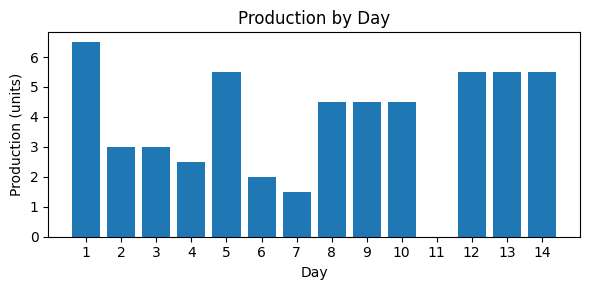

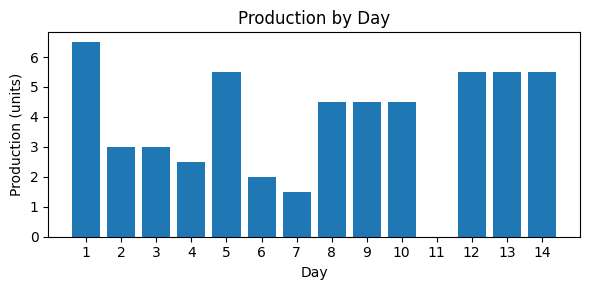

In [2]:
chart = utils.plot_production_by_day(playback_tables.day)
chart